The packages being used in this assignment are sklearn \cite{scikit-learn}, pyfim \cite{pyfim-webpage}, seaborn \cite{seaborn-webpage} and mlxtend \cite{mlxtend}.

In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# A
## Descriptive Analytics and Preprocessing

The dataset being used for this section is the State Plant Checklist dataset \cite{plants-dataset}.

In [3]:
data = pd.read_csv('./datasets/dataset.csv', sep=",")
data.head()

Symbol Synonym Symbol                        Scientific Name with Author  \
0   JUAM            NaN                       Justicia americana (L.) Vahl   
1   JUAM          DIAM2                             Dianthera americana L.   
2   JUAM          DIAMS  Dianthera americana L. var. subcoriacea (Ferna...   
3   JUAM          JUAMS  Justicia americana (L.) Vahl var. subcoriacea ...   
4   JUAM          JUMO2                    Justicia mortuifluminis Fernald   

    National Common Name       Family  
0  American water-willow  Acanthaceae  
1                    NaN  Acanthaceae  
2                    NaN  Acanthaceae  
3                    NaN  Acanthaceae  
4                    NaN  Acanthaceae

In [5]:
data.shape

(13989, 5)

In [68]:
data.describe()

Symbol Synonym Symbol               Scientific Name with Author  \
count   13989           8763                                     13989   
unique   5226           8763                                     13986   
top      DECE           CYNI  Quercus prinus L. p.p., nom. utique rej.   
freq       46              1                                         2   

       National Common Name      Family  
count                  5217       13989  
unique                 4119         217  
top           hybrid violet  Asteraceae  
freq                     19        1718

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13989 entries, 0 to 13988
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Symbol                       13989 non-null  object
 1   Synonym Symbol               8763 non-null   object
 2   Scientific Name with Author  13989 non-null  object
 3   National Common Name         5217 non-null   object
 4   Family                       13989 non-null  object
dtypes: object(5)
memory usage: 546.6+ KB


So the data info shows that all our features are **categorical variables** and we do have **nan values present in "Synonym Symbol" and "National Common Name" features**.

In [7]:
data.isna().sum()

Symbol                            0
Synonym Symbol                 5226
Scientific Name with Author       0
National Common Name           8772
Family                            0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1649ec1908>,
      dtype=object)

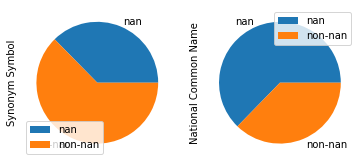

In [32]:
nan = list(filter(lambda x: x>0,(list(data.isnull().sum()))))
nan = list(map(lambda x: x/len(data),nan))
y = [1-x for x in nan]
nan = pd.DataFrame({'Synonym Symbol':[nan[0],y[0]],'National Common Name':[nan[1],y[1]]},index=["nan","non-nan"])
nan.plot.pie(subplots= True)

In [33]:
data['Family'].nunique()

217

In [41]:
data['Family'].value_counts()

Asteraceae         1718
Poaceae            1712
Cyperaceae          963
Rosaceae            960
Fabaceae            546
                   ... 
Hymeneliaceae         1
Teloschistaceae       1
Acarosporaceae        1
Parmeliaceae          1
Grimmiaceae           1
Name: Family, Length: 217, dtype: int64

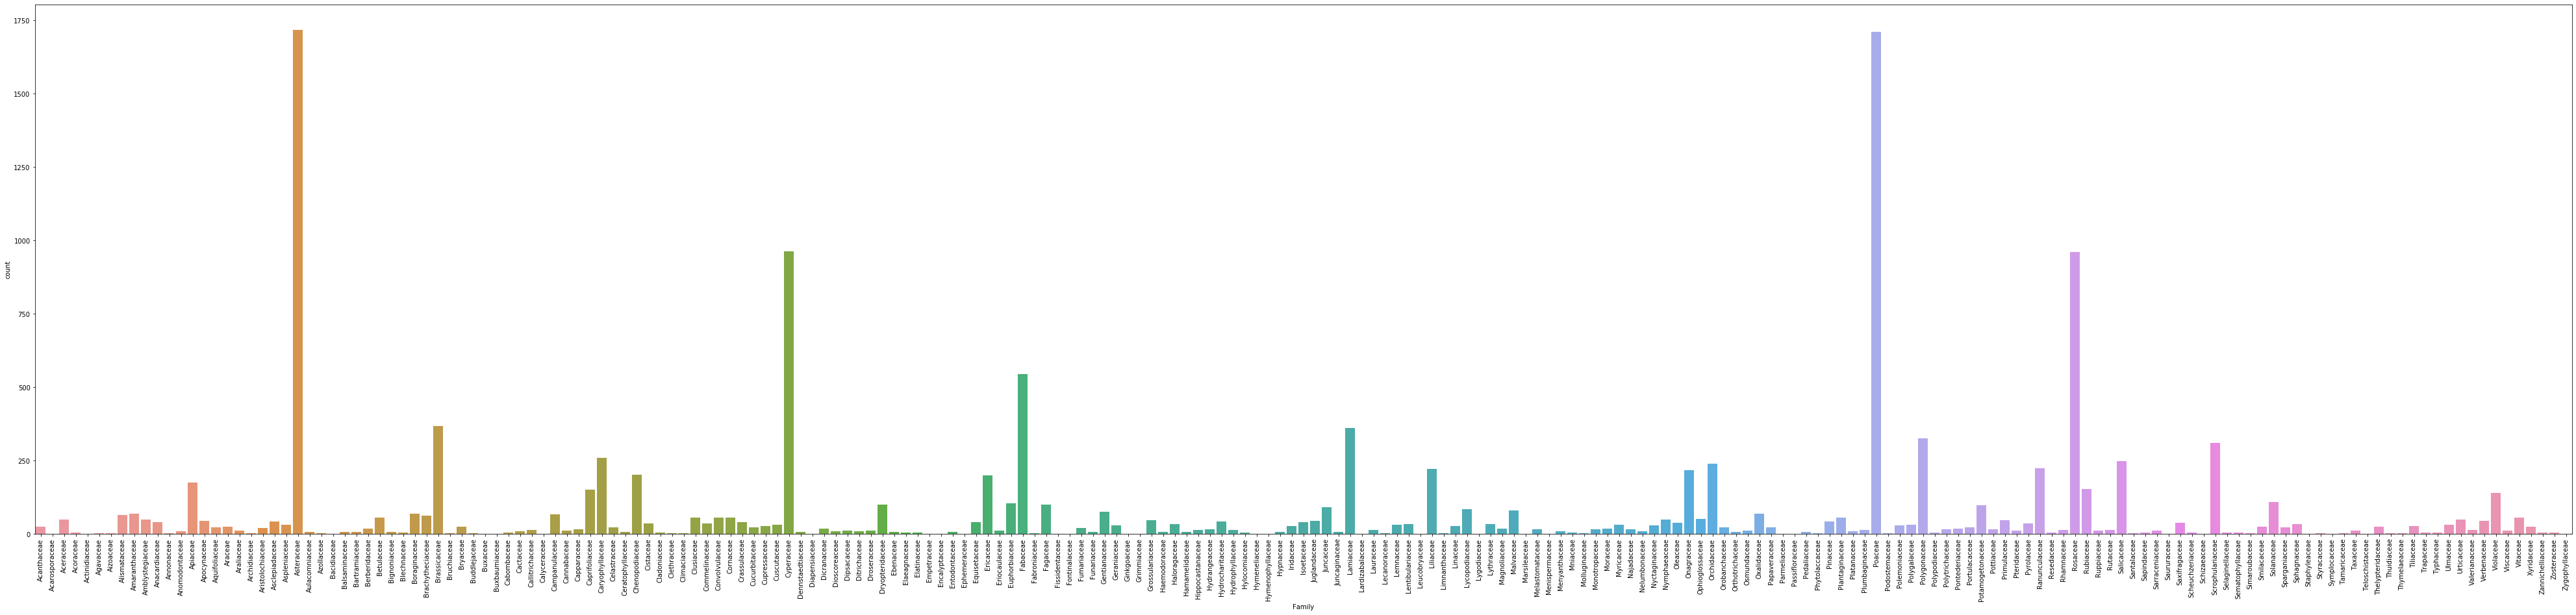

In [38]:
fig_dims = (70,15)

fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Family', data=data, ax=ax)

plt.xticks(rotation = 90)

plt.show()

In [39]:
data['Symbol'].nunique()

5226

In [44]:
data['Symbol'].value_counts()

DECE     46
CRSU5    44
CRCR2    40
DIDID    39
CRPR2    35
         ..
RHEXI     1
ASPL      1
CLVIH     1
LESI2     1
DRAD2     1
Name: Symbol, Length: 5226, dtype: int64

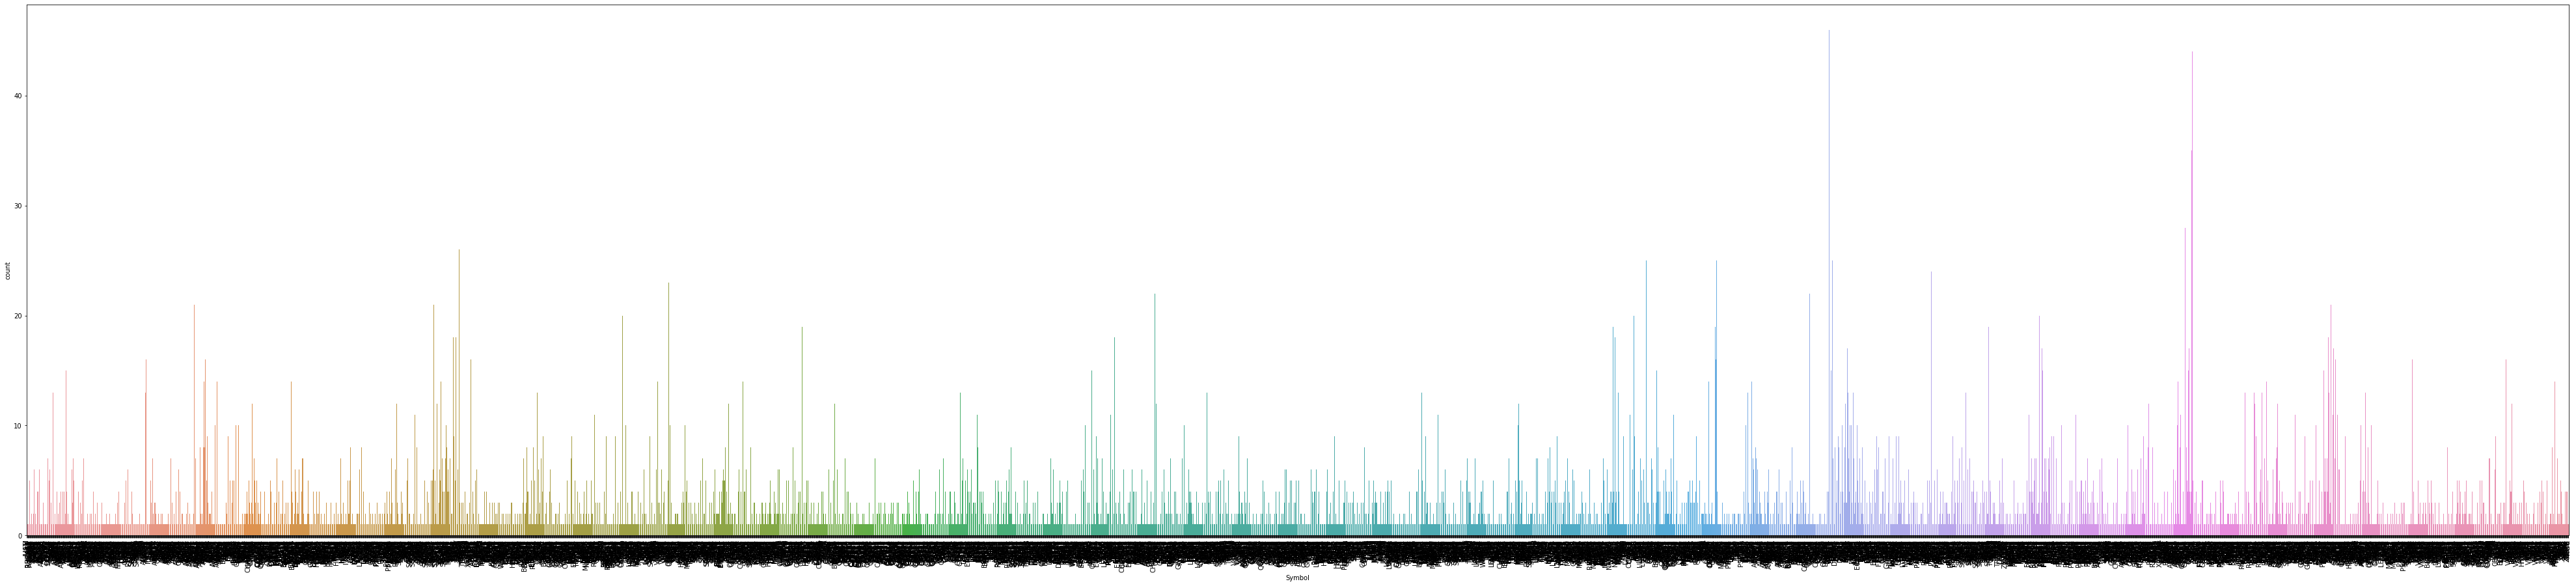

In [57]:
fig_dims = (70,15)

fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Symbol', data=data, ax=ax)

plt.xticks(rotation = 90)

plt.show()

### Data Preprocessing

Since any the dataset is **categorical** and not **transactional**, preprocessing the data to support any kind of descriptive analytics is not possible. We can either drop the columns with *nan* values or convert the records such that there are no *nan* values in the record i.e. varying number of columns in the records. We can also choose to intelligently replace the *nan* values with the most commonly occurring values in the dataset, but doing so results in corrupting the model as the new replaced values dominate the models and the inherent patterns arent captured.

Here we choose to drop the columns with *nan* values, namely *Synonym Symbol* and *National Common Name*.

In [51]:
df = data.drop(['Synonym Symbol','National Common Name'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13989 entries, 0 to 13988
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Symbol                       13989 non-null  object
 1   Scientific Name with Author  13989 non-null  object
 2   Family                       13989 non-null  object
dtypes: object(3)
memory usage: 328.0+ KB


In [52]:
df.head()

Symbol                        Scientific Name with Author       Family
0   JUAM                       Justicia americana (L.) Vahl  Acanthaceae
1   JUAM                             Dianthera americana L.  Acanthaceae
2   JUAM  Dianthera americana L. var. subcoriacea (Ferna...  Acanthaceae
3   JUAM  Justicia americana (L.) Vahl var. subcoriacea ...  Acanthaceae
4   JUAM                    Justicia mortuifluminis Fernald  Acanthaceae

In [69]:
df.to_csv("./datasets/dataset_preprocessed.csv", encoding='utf-8', index=False)

A few algortithms expect the data to be in one-hot encoded format. Hence we convert our dataset to the appropriate format.

In [10]:
from mlxtend.preprocessing import TransactionEncoder
import csv

df = pd.read_csv("./datasets/dataset_preprocessed.csv")
df_list = df.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(df_list).transform(df_list)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)
df_onehot

ABAB70  ...  ×Cyperus weatherbianus
0       False  ...                   False
1       False  ...                   False
2       False  ...                   False
3       False  ...                   False
4       False  ...                   False
...       ...  ...                     ...
13984   False  ...                   False
13985   False  ...                   False
13986   False  ...                   False
13987   False  ...                   False
13988   False  ...                   False

[13989 rows x 14828 columns]

We use the above dataset for the itemset analysis.

## Association Rule Mining

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It is intended to identify strong rules discovered in databases using some measures of interestingness.

The first step to mining rules is to mine itemsets. There are different types of itemsets namely - 

    \begin{enumerate}
        \item Frequent itemsets
        \item Closed frequent itemsets
        \item Maximal frequent itemsets
        \item Longest frequent itemsets
    \end{enumerate


### Frequent Itemset Mining

In frequent mining usually the interesting associations and correlations between item sets in transactional and relational databases are found. In short, Frequent Mining shows which items appear together in a transaction or relation. We see the following algorithms for Frequent Itemset Mining.
    
    \begin{enumerate}
        \item Apriori
        \item FP-growth
    \end{enumerate}


#### Apriori


In [74]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(df_onehot,min_support=0.002,use_colnames=True)
frequent_itemsets

support           itemsets
0   0.003574        (Aceraceae)
1   0.004647     (Alismataceae)
2   0.005004    (Amaranthaceae)
3   0.003574  (Amblystegiaceae)
4   0.002931    (Anacardiaceae)
..       ...                ...
90  0.003145  (Rosaceae, CRSU5)
91  0.003288    (DECE, Poaceae)
92  0.002788   (DIDID, Poaceae)
93  0.002073   (ELTRT, Poaceae)
94  0.002073   (Rosaceae, RUFL)

[95 rows x 2 columns]

Now we mine some interesting rules from the above itemsets. We use confidence to evaluate the rules and choose rules which have a confidence of above 0.7 

In [79]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

antecedents consequents  antecedent support  consequent support   support  \
0      (DECE)   (Poaceae)            0.003288            0.122382  0.003288   
1     (DIDID)   (Poaceae)            0.002788            0.122382  0.002788   
2     (ELTRT)   (Poaceae)            0.002073            0.122382  0.002073   
3    (CRCHC2)  (Rosaceae)            0.002002            0.068625  0.002002   
4     (CRCR2)  (Rosaceae)            0.002859            0.068625  0.002859   
5     (CRPR2)  (Rosaceae)            0.002502            0.068625  0.002502   
6     (CRSU5)  (Rosaceae)            0.003145            0.068625  0.003145   
7      (RUFL)  (Rosaceae)            0.002073            0.068625  0.002073   

   confidence       lift  leverage  conviction  
0         1.0   8.171145  0.002886         inf  
1         1.0   8.171145  0.002447         inf  
2         1.0   8.171145  0.001819         inf  
3         1.0  14.571875  0.001864         inf  
4         1.0  14.571875  0.002663         inf  
5         1.0  14.571875  0.002330         inf  
6         1.0  14.571875  0.002929         inf  
7         1.0  14.571875  0.001931         inf

#### FP-Growth

In [77]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets = fpgrowth(df_onehot,min_support=0.002,use_colnames=True)
frequent_itemsets

support            itemsets
0   0.003574         (Aceraceae)
1   0.004647      (Alismataceae)
2   0.005004     (Amaranthaceae)
3   0.003574   (Amblystegiaceae)
4   0.002931     (Anacardiaceae)
..       ...                 ...
90  0.002002  (CRCHC2, Rosaceae)
91  0.002859   (CRCR2, Rosaceae)
92  0.002502   (Rosaceae, CRPR2)
93  0.003145   (Rosaceae, CRSU5)
94  0.002073    (Rosaceae, RUFL)

[95 rows x 2 columns]

In [78]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

antecedents consequents  antecedent support  consequent support   support  \
0      (DECE)   (Poaceae)            0.003288            0.122382  0.003288   
1     (DIDID)   (Poaceae)            0.002788            0.122382  0.002788   
2     (ELTRT)   (Poaceae)            0.002073            0.122382  0.002073   
3    (CRCHC2)  (Rosaceae)            0.002002            0.068625  0.002002   
4     (CRCR2)  (Rosaceae)            0.002859            0.068625  0.002859   
5     (CRPR2)  (Rosaceae)            0.002502            0.068625  0.002502   
6     (CRSU5)  (Rosaceae)            0.003145            0.068625  0.003145   
7      (RUFL)  (Rosaceae)            0.002073            0.068625  0.002073   

   confidence       lift  leverage  conviction  
0         1.0   8.171145  0.002886         inf  
1         1.0   8.171145  0.002447         inf  
2         1.0   8.171145  0.001819         inf  
3         1.0  14.571875  0.001864         inf  
4         1.0  14.571875  0.002663         inf  
5         1.0  14.571875  0.002330         inf  
6         1.0  14.571875  0.002929         inf  
7         1.0  14.571875  0.001931         inf

### Closed Frequent Itemset Mining(CFI)

An itemset is closed if none of its immediate supersets have same support count same as Itemset. We use the following algorithms - 

    \begin{enumerate}
        \item A-Close (Modified version of Apriori)
        \item ECLAT-Close (Modified version of ECLAT)
    \end{enumerate}

#### A-Close

In [41]:
from fim import apriori
itemsets = pd.DataFrame(apriori(df_list,target='c',supp=0.02,report='s'),columns = ['Itemset','Support'])
itemsets

Itemset   Support
0     (VESES, Scrophulariaceae)  0.000214
1           (VEBR, Verbenaceae)  0.000214
2           (LISM, Orchidaceae)  0.000214
3              (APAM, Fabaceae)  0.000214
4           (CIPU4, Asteraceae)  0.000214
...                         ...       ...
1922                (Fabaceae,)  0.039031
1923                (Rosaceae,)  0.068625
1924              (Cyperaceae,)  0.068840
1925                 (Poaceae,)  0.122382
1926              (Asteraceae,)  0.122811

[1927 rows x 2 columns]

#### ECLAT-Close

In [40]:
from fim import eclat
itemsets = pd.DataFrame(eclat(df_list,target='c',supp=0.02,report='s'),columns = ['Itemset','Support'])
itemsets

Itemset   Support
0                (Asteraceae,)  0.122811
1                   (Poaceae,)  0.122382
2                (Cyperaceae,)  0.068840
3                  (Rosaceae,)  0.068625
4                  (Fabaceae,)  0.039031
...                        ...       ...
1922         (VICRC, Fabaceae)  0.000214
1923          (Limnanthaceae,)  0.000214
1924    (ANSP11, Fabroniaceae)  0.000214
1925  (PEHI, Scrophulariaceae)  0.000214
1926        (ALRO3, Malvaceae)  0.000214

[1927 rows x 2 columns]

### Maximal Frequent Itemset Mining(MFI)

An itemset is maximal frequent if none of its supersets are frequent. We use the following algotithms - 
    
    \begin{enumerate} 
        \item FP-Max (Variation of FP-growth to produce MFI)
        \item A-Max (Variation of apriori to produce MFI)
    \end{enumerate}

##### FP-Max

In [39]:
from mlxtend.frequent_patterns import fpmax,association_rules
itemsets = fpmax(df_onehot, min_support=0.0002, use_colnames=True,max_len = 10)
itemsets

support                   itemsets
0     0.000214      (ABAB70, Thuidiaceae)
1     0.000214       (PHGR22, Solanaceae)
2     0.000214   (Hydrophyllaceae, PHBI2)
3     0.000214   (Caryophyllaceae, PEPR4)
4     0.000214  (PEPA7, Scrophulariaceae)
...        ...                        ...
1760  0.002502          (CRPR2, Rosaceae)
1761  0.002788           (DIDID, Poaceae)
1762  0.002859          (Rosaceae, CRCR2)
1763  0.003145          (Rosaceae, CRSU5)
1764  0.003288            (DECE, Poaceae)

[1765 rows x 2 columns]

#### A-Max

In [38]:
from fim import apriori
itemsets = pd.DataFrame(apriori(df_list,target='m',supp=0.02,report='s'),columns = ['Itemset','Support'])
itemsets

Itemset   Support
0     (VESES, Scrophulariaceae)  0.000214
1           (VEBR, Verbenaceae)  0.000214
2           (LISM, Orchidaceae)  0.000214
3              (APAM, Fabaceae)  0.000214
4           (CIPU4, Asteraceae)  0.000214
...                         ...       ...
1760          (CRPR2, Rosaceae)  0.002502
1761           (DIDID, Poaceae)  0.002788
1762          (CRCR2, Rosaceae)  0.002859
1763          (CRSU5, Rosaceae)  0.003145
1764            (DECE, Poaceae)  0.003288

[1765 rows x 2 columns]

## Predictive Analysis

Since the given dataset is not suitable for any kind of predictive analysis. We use a different dataset to show different methods of predictive analysis. The dataset being used here is the Banknote authentication dataset \cite{uci-ml}.

In [22]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
dataset = pd.read_csv("./datasets/bill_authentication.csv")
X = dataset.drop('Class', axis=1)
y = dataset['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)
print("Labels -",list(dataset['Class'].unique()))
#SGD
sgd = linear_model.SGDClassifier(max_iter=100000, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

#Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

#KNN

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

#Gaussian Naive Bayes
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

#Perceptron
perceptron = Perceptron(max_iter=10000)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

#Linear SVM
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

#Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

#Best Model
number = 8
results = pd.DataFrame({
    'Model': ['Support Vector Machines',
		'KNN', 
		'Logistic Regression', 
              'Random Forest',
		'Naive Bayes', 
		'Perceptron', 
              'Decision Tree'
	],
    'Score': [acc_linear_svc, 
		acc_knn, acc_log, 
              acc_random_forest, 
		acc_gaussian, 
		acc_perceptron, 
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(number)


Labels - [0, 1]


Model
Score                          
100.00                      KNN
100.00            Random Forest
100.00            Decision Tree
99.18       Logistic Regression
98.91   Support Vector Machines
98.81                Perceptron
84.87               Naive Bayes

# B - Different Metrics to evaluate rules \cite{mlxtend}

The various metrics for evaluating association rules and setting selection thresholds are listed below.
Given a rule "A -> C", A stands for antecedent and C stands for consequent.

- **support**:

    support(A→C)=support(A∪C),range: [0,1]
    
    The support metric is defined for itemsets, not assocication rules. The table produced by the association rule mining algorithm contains three different support metrics: **antecedent support**, **consequent support**, and **support**. Here, **antecedent support** computes the proportion of transactions that contain the antecedent A, and **consequent support** computes the support for the itemset of the consequent C. The **support** metric then computes the support of the combined itemset A ∪ C .
    
    note that **support** depends on **antecedent support** and **consequent support** via min(**antecedent support**, **consequent support**).
    
    Typically, support is used to measure the abundance or frequency (often interpreted as significance or importance) of an itemset in a database. We refer to an itemset as a "frequent itemset" if you support is larger than a specified minimum-support threshold. Note that in general, due to the downward closure property, all subsets of a frequent itemset are also frequent.

- **confidence**:

    confidence(A→C)=support(A→C)support(A),range: [0,1]
    
    The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.

- **lift**:

    lift(A→C)=confidence(A→C)support(C),range: [0,∞]
    
    The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

- **leverage**:

    levarage(A→C)=support(A→C)−support(A)×support(C),range: [−1,1]
    
    Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.

- **conviction**:

    conviction(A→C)=1−support(C)1−confidence(A→C),range: [0,∞]
    
    A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as *inf* . Similar to lift, if items are independent, the conviction is 1.
    
The dataset being used here is the Online Retail dataset \cite{uci-ml} \cite{retail-transactions}.

In [4]:
data = pd.read_csv('./datasets/online_retail.csv')
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  01/12/2010 08:26:00       2.55     17850.0  United Kingdom  
1  01/12/2010 08:26:00       3.39     17850.0  United Kingdom  
2  01/12/2010 08:26:00       2.75     17850.0  United Kingdom  
3  01/12/2010 08:26:00       3.39     17850.0  United Kingdom  
4  01/12/2010 08:26:00       3.39     17850.0  United Kingdom

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37498 entries, 0 to 37497
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    37498 non-null  object 
 1   StockCode    37498 non-null  object 
 2   Description  37381 non-null  object 
 3   Quantity     37498 non-null  int64  
 4   InvoiceDate  37498 non-null  object 
 5   UnitPrice    37498 non-null  float64
 6   CustomerID   24588 non-null  float64
 7   Country      37498 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.3+ MB


In [9]:
data['Description'] = data['Description'].str.strip()
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]
basket_France = (data
		.groupby(['InvoiceNo', 'Description'])['Quantity']
		.sum().unstack().reset_index().fillna(0)
		.set_index('InvoiceNo'))
basket_UK = (data[data['Country'] =="United Kingdom"]
		.groupby(['InvoiceNo', 'Description'])['Quantity']
		.sum().unstack().reset_index().fillna(0)
		.set_index('InvoiceNo'))

basket_Por = (data[data['Country'] =="Portugal"]
		.groupby(['InvoiceNo', 'Description'])['Quantity']
		.sum().unstack().reset_index().fillna(0)
		.set_index('InvoiceNo'))

basket_Sweden = (data[data['Country'] =="Sweden"]
		.groupby(['InvoiceNo', 'Description'])['Quantity']
		.sum().unstack().reset_index().fillna(0)
		.set_index('InvoiceNo'))

def hot_encode(x):
	if(x<= 0):
		return 0
	if(x>= 1):
		return 1

basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded

basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded

basket_encoded = basket_Por.applymap(hot_encode)
basket_Por = basket_encoded

basket_encoded = basket_Sweden.applymap(hot_encode)
basket_Sweden = basket_encoded

basket_France

Description  *Boombox Ipod Classic  *USB Office Mirror Ball  ...  damages  \
InvoiceNo                                                    ...            
536365                           0                        0  ...        0   
536366                           0                        0  ...        0   
536367                           0                        0  ...        0   
536368                           0                        0  ...        0   
536369                           0                        0  ...        0   
...                            ...                      ...  ...      ...   
539464                           0                        0  ...        0   
539465                           0                        0  ...        0   
539466                           0                        0  ...        0   
539468                           0                        0  ...        0   
539738                           0                        0  ...        0   

Description  faulty  
InvoiceNo            
536365            0  
536366            0  
536367            0  
536368            0  
536369            0  
...             ...  
539464            0  
539465            0  
539466            0  
539468            0  
539738            0  

[1397 rows x 2684 columns]

## Lift

In [3]:
frq_items = apriori(basket_France, min_support = 0.02, use_colnames = True, max_len = 5)

rules = association_rules(frq_items, metric ="lift", min_threshold = 2)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules

antecedents  \
1234  (PAPER CHAIN KIT VINTAGE CHRISTMAS, KNITTED UN...   
1349  (PAPER CHAIN KIT VINTAGE CHRISTMAS, WHITE SKUL...   
900   (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...   
875   (RIBBON REEL CHRISTMAS SOCK BAUBLE, 60 CAKE CA...   
882   (RIBBON REEL SNOWY VILLAGE, 60 CAKE CASES VINT...   
...                                                 ...   
765                (WHITE HANGING HEART T-LIGHT HOLDER)   
281                (WHITE HANGING HEART T-LIGHT HOLDER)   
556                (WHITE HANGING HEART T-LIGHT HOLDER)   
715                (WHITE HANGING HEART T-LIGHT HOLDER)   
531                (WHITE HANGING HEART T-LIGHT HOLDER)   

                              consequents  antecedent support  \
1234     (PAPER CHAIN KIT 50'S CHRISTMAS)            0.022906   
1349     (PAPER CHAIN KIT 50'S CHRISTMAS)            0.022906   
900          (ALARM CLOCK BAKELIKE GREEN)            0.020759   
875   (PAPER CHAIN KIT VINTAGE CHRISTMAS)            0.020759   
882   (PAPER CHAIN KIT VINTAGE CHRISTMAS)            0.020759   
...                                   ...                 ...   
765          (RETRO COFFEE MUGS ASSORTED)            0.146743   
281         (GIN + TONIC DIET METAL SIGN)            0.146743   
556              (JUMBO STORAGE BAG SUKI)            0.146743   
715        (PLEASE ONE PERSON METAL SIGN)            0.146743   
531            (JAM MAKING SET WITH JARS)            0.146743   

      consequent support   support  confidence       lift  leverage  \
1234            0.110236  0.022190    0.968750   8.787946  0.019665   
1349            0.110236  0.022190    0.968750   8.787946  0.019665   
900             0.063708  0.020043    0.965517  15.155366  0.018720   
875             0.088046  0.020043    0.965517  10.966078  0.018215   
882             0.088046  0.020043    0.965517  10.966078  0.018215   
...                  ...       ...         ...        ...       ...   
765             0.037223  0.020043    0.136585   3.669418  0.014581   
281             0.041518  0.020043    0.136585   3.289823  0.013951   
556             0.045097  0.020043    0.136585   3.028726  0.013425   
715             0.063708  0.020043    0.136585   2.143930  0.010694   
531             0.065140  0.020043    0.136585   2.096811  0.010484   

      conviction  
1234   28.472441  
1349   28.472441  
900    27.152470  
875    26.446671  
882    26.446671  
...          ...  
765     1.115081  
281     1.110107  
556     1.105962  
715     1.084406  
531     1.082748  

[1436 rows x 9 columns]

## Support

In [5]:
frq_items = apriori(basket_Por, min_support = 0.2, use_colnames = True, max_len = 5)
rules = association_rules(frq_items, metric ="support", min_threshold = 0.25)
rules = rules.sort_values(['support', 'lift'], ascending =[False, False])
rules

antecedents  \
16                               (LUNCH BAG CARS BLUE)   
17                                           (POSTAGE)   
2                  (JUMBO SHOPPER VINTAGE RED PAISLEY)   
3                             (JUMBO STORAGE BAG SUKI)   
36                              (RECIPE BOX RETROSPOT)   
..                                                 ...   
143                                          (POSTAGE)   
148  (RECIPE BOX RETROSPOT, RED GINGHAM TEDDY BEAR,...   
157                                          (POSTAGE)   
161  (TRADITIONAL WOODEN CATCH CUP GAME, RED  HARMO...   
172                                          (POSTAGE)   

                                           consequents  antecedent support  \
16                                           (POSTAGE)            0.500000   
17                               (LUNCH BAG CARS BLUE)            1.000000   
2                             (JUMBO STORAGE BAG SUKI)            0.333333   
3                  (JUMBO SHOPPER VINTAGE RED PAISLEY)            0.333333   
36                            (RED GINGHAM TEDDY BEAR)            0.333333   
..                                                 ...                 ...   
143  (JUMBO SHOPPER VINTAGE RED PAISLEY, LUNCH BAG ...            1.000000   
148                                          (POSTAGE)            0.333333   
157  (RECIPE BOX RETROSPOT, RED GINGHAM TEDDY BEAR,...            1.000000   
161                                          (POSTAGE)            0.333333   
172  (TRADITIONAL WOODEN CATCH CUP GAME, RED  HARMO...            1.000000   

     consequent support   support  confidence  lift  leverage  conviction  
16             1.000000  0.500000    1.000000   1.0  0.000000         inf  
17             0.500000  0.500000    0.500000   1.0  0.000000         1.0  
2              0.333333  0.333333    1.000000   3.0  0.222222         inf  
3              0.333333  0.333333    1.000000   3.0  0.222222         inf  
36             0.333333  0.333333    1.000000   3.0  0.222222         inf  
..                  ...       ...         ...   ...       ...         ...  
143            0.333333  0.333333    0.333333   1.0  0.000000         1.0  
148            1.000000  0.333333    1.000000   1.0  0.000000         inf  
157            0.333333  0.333333    0.333333   1.0  0.000000         1.0  
161            1.000000  0.333333    1.000000   1.0  0.000000         inf  
172            0.333333  0.333333    0.333333   1.0  0.000000         1.0  

[174 rows x 9 columns]

## Leverage

In [6]:
frq_items = apriori(basket_Sweden, min_support = 0.02, use_colnames = True, max_len = 5)
rules = association_rules(frq_items, metric ="leverage", min_threshold = -0.4)
rules = rules.sort_values(['leverage', 'lift'], ascending =[False, False])
rules

antecedents  \
0                     (36 DOILIES DOLLY GIRL)   
1             (5 HOOK HANGER MAGIC TOADSTOOL)   
2                     (36 DOILIES DOLLY GIRL)   
3           (60 CAKE CASES DOLLY GIRL DESIGN)   
4                     (36 DOILIES DOLLY GIRL)   
...                                       ...   
1785395         (TEA BAG PLATE RED RETROSPOT)   
1785396       (SET OF 3 CAKE TINS SKETCHBOOK)   
1785397  (SET OF 72 RETROSPOT PAPER  DOILIES)   
1785398   (WORLD WAR 2 GLIDERS ASSTD DESIGNS)   
1785399                (VICTORIAN SEWING KIT)   

                                               consequents  \
0                          (5 HOOK HANGER MAGIC TOADSTOOL)   
1                                  (36 DOILIES DOLLY GIRL)   
2                        (60 CAKE CASES DOLLY GIRL DESIGN)   
3                                  (36 DOILIES DOLLY GIRL)   
4                         (72 SWEETHEART FAIRY CAKE CASES)   
...                                                    ...   
1785395  (VICTORIAN SEWING KIT, SET OF 3 CAKE TINS SKET...   
1785396  (VICTORIAN SEWING KIT, WORLD WAR 2 GLIDERS ASS...   
1785397  (SET OF 3 CAKE TINS SKETCHBOOK, VICTORIAN SEWI...   
1785398  (SET OF 3 CAKE TINS SKETCHBOOK, VICTORIAN SEWI...   
1785399  (SET OF 3 CAKE TINS SKETCHBOOK, WORLD WAR 2 GL...   

         antecedent support  consequent support  support  confidence  lift  \
0                       0.5                 0.5      0.5         1.0   2.0   
1                       0.5                 0.5      0.5         1.0   2.0   
2                       0.5                 0.5      0.5         1.0   2.0   
3                       0.5                 0.5      0.5         1.0   2.0   
4                       0.5                 0.5      0.5         1.0   2.0   
...                     ...                 ...      ...         ...   ...   
1785395                 0.5                 0.5      0.5         1.0   2.0   
1785396                 0.5                 0.5      0.5         1.0   2.0   
1785397                 0.5                 0.5      0.5         1.0   2.0   
1785398                 0.5                 0.5      0.5         1.0   2.0   
1785399                 0.5                 0.5      0.5         1.0   2.0   

         leverage  conviction  
0            0.25         inf  
1            0.25         inf  
2            0.25         inf  
3            0.25         inf  
4            0.25         inf  
...           ...         ...  
1785395      0.25         inf  
1785396      0.25         inf  
1785397      0.25         inf  
1785398      0.25         inf  
1785399      0.25         inf  

[1785400 rows x 9 columns]

## Conviction

In [7]:
frq_items = apriori(basket_UK, min_support = 0.02, use_colnames = True, max_len = 5)

rules = association_rules(frq_items, metric ="conviction", min_threshold = 2.0)
rules = rules.sort_values(['conviction', 'lift'], ascending =[False, False])
rules

antecedents  \
142  (PACK OF 72 RETROSPOT CAKE CASES, 6 RIBBONS RU...   
513  (PAPER CHAIN KIT VINTAGE CHRISTMAS, HOT WATER ...   
350  (PAPER CHAIN KIT VINTAGE CHRISTMAS, KNITTED UN...   
422  (PAPER CHAIN KIT VINTAGE CHRISTMAS, WHITE SKUL...   
162  (RIBBON REEL CHRISTMAS SOCK BAUBLE, 60 CAKE CA...   
..                                                 ...   
489  (CHOCOLATE HOT WATER BOTTLE, WHITE SKULL HOT W...   
511  (CHOCOLATE HOT WATER BOTTLE, WHITE SKULL HOT W...   
233  (WHITE HANGING HEART T-LIGHT HOLDER, PAPER CHA...   
79                       (RED RETROSPOT CHARLOTTE BAG)   
131                   (SWEETHEART CERAMIC TRINKET BOX)   

                                           consequents  antecedent support  \
142                   (PAPER CHAIN KIT 50'S CHRISTMAS)            0.020721   
513                   (PAPER CHAIN KIT 50'S CHRISTMAS)            0.020721   
350                   (PAPER CHAIN KIT 50'S CHRISTMAS)            0.024559   
422                   (PAPER CHAIN KIT 50'S CHRISTMAS)            0.024559   
162                (PAPER CHAIN KIT VINTAGE CHRISTMAS)            0.022256   
..                                                 ...                 ...   
489  (SCOTTIE DOG HOT WATER BOTTLE, HOT WATER BOTTL...            0.039908   
511  (SCOTTIE DOG HOT WATER BOTTLE, KNITTED UNION F...            0.039908   
233                       (CHOCOLATE HOT WATER BOTTLE)            0.037606   
79                           (JUMBO BAG RED RETROSPOT)            0.038373   
131                             (SMALL POPCORN HOLDER)            0.039908   

     consequent support   support  confidence       lift  leverage  conviction  
142            0.116654  0.020721    1.000000   8.572368  0.018304         inf  
513            0.116654  0.020721    1.000000   8.572368  0.018304         inf  
350            0.116654  0.023791    0.968750   8.304482  0.020926   28.267076  
422            0.116654  0.023791    0.968750   8.304482  0.020926   28.267076  
162            0.092095  0.021489    0.965517  10.483908  0.019439   26.329240  
..                  ...       ...         ...        ...       ...         ...  
489            0.032233  0.020721    0.519231  16.108516  0.019435    2.012955  
511            0.033001  0.020721    0.519231  15.733900  0.019404    2.011358  
233            0.097467  0.020721    0.551020   5.653383  0.017056    2.010186  
79             0.075979  0.020721    0.540000   7.107273  0.017806    2.008742  
131            0.076746  0.021489    0.538462   7.016154  0.018426    2.000384  

[531 rows x 9 columns]

# C - Decision tree, Bayes Classification

The dataset being used for this section is the Banknote Authentication dataset \cite{uci-ml}.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
dataset = pd.read_csv("./datasets/bill_authentication.csv")
X = dataset.drop('Class', axis=1)
y = dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Labels -",list(dataset['Class'].unique()))

Labels - [0, 1]


## Decision tree

Decision tree learning is one of the predictive modeling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.


Decision Tree
Confusion matrix, without normalization
[[152   1]
 [  5 117]]


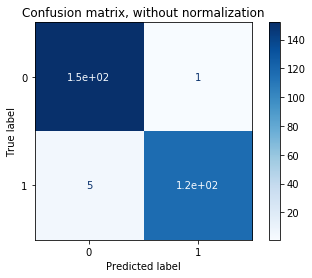

Normalized confusion matrix
[[0.99346405 0.00653595]
 [0.04098361 0.95901639]]


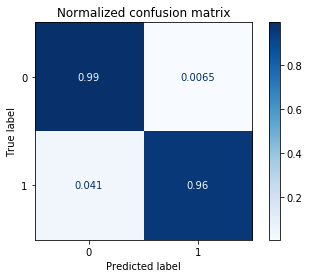

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.99      0.96      0.97       122

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [7]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Decision Tree")
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()
print(classification_report(y_test, y_pred))

## Bayesian Classifier
Bayesian classification is based on Bayes' Theorem. Bayesian classifiers are the statistical classifiers. Bayesian classifiers can predict class membership probabilities such as the probability that a given tuple belongs to a particular class.


Gaussian Naive Bayes
Confusion matrix, without normalization
[[166   0]
 [  0 109]]


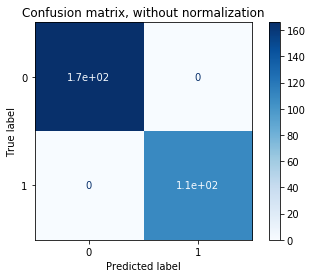

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


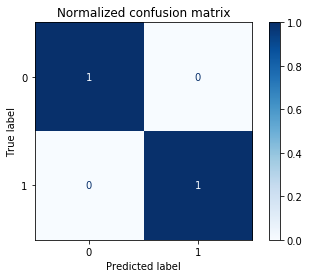

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       166
           1       0.83      0.84      0.84       109

    accuracy                           0.87       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.87      0.87      0.87       275



In [9]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print()
print("Gaussian Naive Bayes")
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()
print(classification_report(y_test, y_pred))